# <font color=#EEAA11> HW 03: Visualization, IDA and EDA </font>


![missing](https://jenslaufer.com/figure/source/2019-02-05-visualize_missing_values_with_ggplot/unnamed-chunk-13-1.png)


### Instructions for Submitting Names in Notebooks

Please follow the format below when typing your names in the notebook. 

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**

#### Example:
    Poe, Edgar Allan

> ⚠️ **Failure to follow this format will result in a reduction of your grade.**


Ni, Zhiqiang


## <font color=#00BBFF> Problem #1 - IDA (10 pts) </font>

In this problem you are going to explore IDA: Initial Data Analysis, which is can be defined many ways, but we will assume it contains these steps:
* Data collection and importation
* Data cleaning and preprocessing
* Variable identification and classification
* Basic descriptive statistics
* Data quality assessment
* Missing data analysis
* Outlier detection

🤓 Follow these steps:
* import the planets dataset, which is in Seaborn
    - in this case, the data has been collected for us and you simply need to import it into a Pandas dataframe
* based on your initial assessment of this dataset, how should it be cleaned and processed? discuss your observations in a markdown cell and write the code to complete this task
* what types of variables are there? ordinal? categorical? cardinal? add this to your discussion in the markdown cell
* find the statistics of the different features of the data; what simple methods are in Pandas are there for this? are there variables for which this doesn't make sense? do any of them need to be encoded? 
* based on what you see so far, what is the quality of this data? basic IDA for this might include using `.describe` and `.info` 
* did you note any missing data? make a heat map of this dataset that shows missing values (I have given an example code for this in the past, but feel free to write your own); 
* for each feature/column for which it makes sense, scale the column using the z-score and print the number of outliers for that column (that is, how many rows in the column have values $<-3$ or $>3$ after scaling?)



These IDA steps have already revealed important properties of this dataset. You will want to follow these steps for your project and document what you found. A nice feature of a web app is to have a tab, perhaps called "Dataset(s)", that describes the dataset(s) used for the app. 
____

Next, let's examine EDA, which follows the IDA steps. Let's summarize IDA in a table and compare to EDA:

| Phase | Step | Key Activities |
|-------|------|----------------|
| IDA | 1. Data collection and importation | - Gather data from various sources<br>- Import data into analysis environment (e.g., Python, R) |
| IDA | 2. Data cleaning and preprocessing | - Handle missing values<br>- Remove duplicates<br>- Correct data types<br>- Standardize formats |
| IDA | 3. Variable identification and classification | - Identify dependent and independent variables<br>- Classify variables (numeric, categorical, etc.)<br>- Understand the meaning of each variable |
| IDA | 4. Basic descriptive statistics | - Calculate mean, median, mode<br>- Determine range, variance, standard deviation<br>- Identify minimum and maximum values |
| IDA | 5. Data quality assessment | - Check for inconsistencies<br>- Verify data accuracy<br>- Assess data completeness |
| IDA | 6. Missing data analysis | - Quantify missing data<br>- Identify patterns in missing data<br>- Decide on imputation strategy if necessary |
| IDA | 7. Outlier detection | - Identify potential outliers<br>- Assess impact of outliers<br>- Decide on treatment of outliers |
| EDA | 1. Univariate analysis | - Create histograms, box plots for numeric variables<br>- Generate bar charts for categorical variables<br>- Calculate summary statistics |
| EDA | 2. Bivariate analysis | - Create scatter plots<br>- Perform cross-tabulations<br>- Calculate correlations between pairs of variables |
| EDA | 3. Multivariate analysis | - Use dimensionality reduction techniques (e.g., PCA)<br>- Create pair plots or correlation matrices<br>- Explore interactions between multiple variables |
| EDA | 4. Correlation analysis | - Calculate correlation coefficients<br>- Create correlation heatmaps<br>- Identify strongly correlated variables |
| EDA | 5. Dimensionality assessment | - Evaluate number of features vs. observations<br>- Consider feature selection or extraction methods<br>- Assess impact of high dimensionality on analysis |
| EDA | 6. Pattern and trend identification | - Look for temporal trends in time series data<br>- Identify seasonal patterns<br>- Detect clusters or groupings in the data |
| EDA | 7. Hypothesis generation | - Formulate potential relationships between variables<br>- Develop questions for further investigation<br>- Identify areas for more detailed statistical analysis |

Note: The boundary between IDA and EDA can be fluid, and some activities may overlap or be performed iteratively throughout the analysis process.

In [1]:
### ANSWER

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 1. Load
df = sns.load_dataset("planets")

#check null values
print(df.isnull().sum())

#check data types
print(df.dtypes)

#check duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")


method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64
method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object
Number of duplicate rows: 4


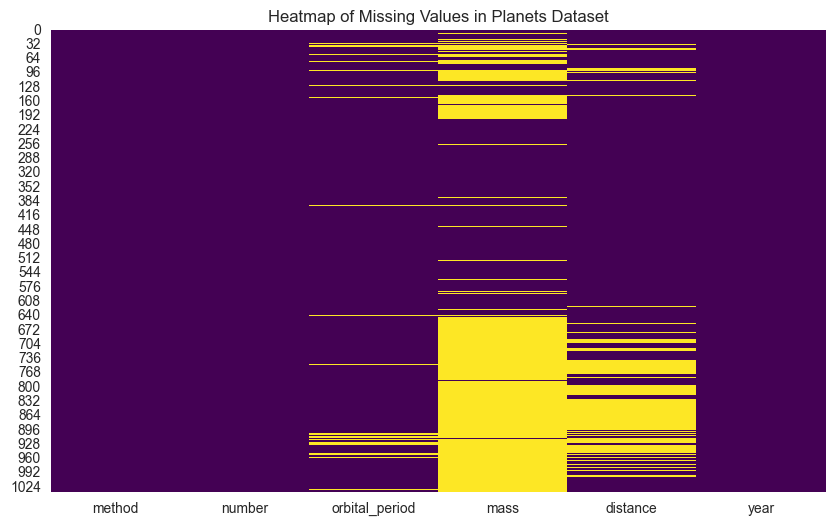

In [2]:
### ANSWER

#heat map of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Planets Dataset')
plt.show()

**ANSWER**

The first things we need to remove the duplicated rows, then there are missing values in orbital_period, mass and distance, we need to remove the missing values too.

There are 6 variable method is nominal categorical, year is ordinal, number is a discrete cardinal variable, and orbital_period, mass, and distance are continuous cardinal variables;

Statistics Pandas methods are .info() to inspect structure, .describe() for numeric summaries (mean, std, min, 25/50/75%, max), .value_counts() for category frequency, .corr() for pairwise correlations. There are some variables that don't make sense, such as method and orbital_period, they need to be encoded. Because method is a categorical variable, we can use one-hot encoding to convert it into numerical format and orbital_period values range is too large, we can use log transformation to reduce the range of values.

quality is ok, requiring explicit missing-data handling or domain-aware imputation. we see mass has 522 missing, distance 227 missing, and orbital_period 43 missing out of ~1000 rows, so mass is heavily incomplete, types are correct method object, others numeric, and there are 4 exact duplicates that were removed;


In [3]:
### ANSWER

#remove duplicated row

df.drop_duplicates().reset_index(drop=True)

#fill na value by median
df['orbital_period'] = df['orbital_period'].fillna(df['orbital_period'].median())
df['mass'] = df['mass'].fillna(df['mass'].median())
df['distance'] = df['distance'].fillna(df['distance'].median())

df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,1.785507,1921.365579,1.943088,218.270271,2009.070531
std,1.240976,25471.074254,2.774105,653.407624,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.747860,1.260000,38.010000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,487.100000,1.260000,130.720000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [4]:
### ANSWER

#for each feature/column for which it makes sense, scale the column using the z-score and print the number of outliers for that column (that is, how many rows in the column have values $<-3$ or $>3$ after scaling?)

numeric_cols = ['orbital_period', 'mass', 'distance', 'year', 'number']
for c in numeric_cols:
    z = (df[c] - df[c].mean())/df[c].std(ddof=0)
    print(c, 'outliers |z|>3:', int((z.abs()>3).sum()))


orbital_period outliers |z|>3: 3
mass outliers |z|>3: 30
distance outliers |z|>3: 15
year outliers |z|>3: 12
number outliers |z|>3: 31


____

## <font color=#00BBFF> Problem #2 - Exploratory Data Analysis (10 pts) </font>

In this problem you are going to explore EDA: Exploratory Data Analysis, which - _like IDA_ - is can be defined many ways, but we will assume it contains these steps:
* Univariate analysis
* Bivariate analysis
* Multivariate analysis
* Correlation analysis
* Dimensionality assessment
* Pattern and trend identification
* Hypothesis generation

Note that IDA did not involve much in the way of visualization; EDA relies heavily on visualization. An important aspect of EDA is that is, as in the name, exploratory. The goals of EDA might be:
* you have a unique dataset and you want to explore whether it contains anything that would be useful or surprising.
* you have a very specific goal in mind already and you want to explore whether this dataset can help you achieve your goal. 

Because this is EDA, with an emphasis on the E, I want you to explore this dataset with little guidance. Use your curiosity, intuition and creativity. 

🤓 Follow these steps:
* only use the Plotly library for this problem, with as many plot types as you can; interactive plots are preferred
* make about one plot per category above - if you are not familiar with a concept, skip that item (e.g., you don't know what PCA is, you have no idea how to do clustering, there are temporal trends, or whatever); shoot for about 5 plots
* but, complete 7: the EDA must lead to something to do next!! use a markdown cell for this


In [13]:
### ANSWER

import plotly.express as px

# 1. Univariate analysis
fig1 = px.histogram(df, x="mass", nbins=50, title="Distribution of Planet Mass")
fig1.show()

# 2. Bivariate analysis
fig2 = px.scatter(df, x="orbital_period", y="mass", color="method",
                  title="Mass vs. Orbital Period by Detection Method", log_x=True, log_y=True)
fig2.show()

# 3. Multivariate analysis
fig3 = px.parallel_coordinates(df, dimensions=["mass", "orbital_period", "distance", "year", "number"],
                               color="year", title="Parallel Coordinates of Numeric Features")
fig3.show()


# 4. Correlation analysis
corr = df[["mass", "orbital_period", "distance", "year", "number"]].corr()
fig4 = px.imshow(corr, text_auto=True, title="Correlation Heatmap")
fig4.show()

# 5. Dimensionality assessment
fig5 = px.scatter_3d(df, x="mass", y="orbital_period", z="distance", color="method",
                     title="3D Scatter: Mass, Orbital Period, Distance", log_x=True, log_y=True, log_z=True)
fig5.show()

# 6. Pattern and trend identification
discoveries_per_year = df.groupby("year").size().reset_index(name="count")
fig6 = px.line(discoveries_per_year, x="year", y="count", title="Number of Planets Discovered per Year")
fig6.show()

**ANSWER**

The EDA shows there is a bias issue with our dataset, as we can see the method clusters strongly with mass and orbital period. Mass, orbital_period, and distance are heavily left-skewed. Lastly Year shows a temporal trend toward detecting smaller planets during 2011. Next we could build a classifier model to estimate detection method from physical/temporal features and quantify feature importance. we could also investigate whether discovery year mediates method–feature relationships.

____

## <font color=#00BBFF>  Problem #3 - Projects (10 points) </font>

It is time to start working on your project!

Read the instructions on projects given in D2L and Teams so that you are very familiar with the plan. As always, please contact us on Teams with any questions that arise!

In a cell below, write your current ideas for your project. I would like this to come from you on a topic what is of interest to you. Answer these questions:
* what topics are you interested in?
* do you already have a dataset you want to work with?
* if not, explore datasets online to see if you can find several that might work
    - as we have seen, there are datasets in some of the standard Python libraries (e.g., Seaborn, sklearn, Pandas), but there are also repos like [this one](https://archive.ics.uci.edu)
* identify a definite dataset you want to work with for the next few weeks - you will be able to change it; in fact, you might find it can't do what you hope and you will have to change it
* discuss the dataset(s) you found and what you think they can do for you: it is important that there is a narrative, a purpose, a story
* from what you know today, what visualizations and interactive elements might you use in your app?

Give as many details as you can. And, if you have any concerns, discuss those as well. We need to think about risk mitigation because in data science we don't always have the data we wish we did. 



**ANSWER**


I am interested in [transportation and uber mobility](https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard). I want to analyze Uber ride data to understand patterns in ride requests, peak hours, and popular locations. My goal is to explore how people use ride sharing services in their daily lives. By analyzing those transportation patterns can reveal insights into a city's rhythm, peak travel times, and the purposes behind on-demand travel.

This dataset contains 148,770 booking records for the full year of 2024. The key features that make it suitable are:
- Date: Date of the booking
- Time: Time of the booking
- Booking ID: Unique identifier for each ride booking
- Booking Status: Status of booking (Completed, Cancelled by Customer, Cancelled by Driver, etc.)
- Customer ID: Unique identifier for customers
- Vehicle Type: Type of vehicle (Go Mini, Go Sedan, Auto, eBike/Bike, UberXL, Premier Sedan)
- Pickup Location: Starting location of the ride
- Drop Location: Destination location of the ride
- Avg VTAT: Average time for driver to reach pickup location (in minutes)
- Avg CTAT: Average trip duration from pickup to destination (in minutes)
- Cancelled Rides by Customer: Customer-initiated cancellation flag
- Reason for cancelling by Customer: Reason for customer cancellation
- Cancelled Rides by Driver: Driver-initiated cancellation flag
- Driver Cancellation Reason: Reason for driver cancellation
- Incomplete Rides: Incomplete ride flag
- Incomplete Rides Reason: Reason for incomplete rides
- Booking Value: Total fare amount for the ride
- Ride Distance: Distance covered during the ride (in km)
- Driver Ratings: Rating given to driver (1-5 scale)
- Customer Rating: Rating given by customer (1-5 scale)
- Payment Method: Method used for payment (UPI, Cash, Credit Card, Uber Wallet, Debit Card)

The story i want to tell is that you can do a diagnosis of a city's transportation patterns and ride-sharing dynamics through Uber ride data. By analyzing the dataset, we can understand why the rides were cancelled, the average wait times, and how these factors impact customer satisfaction. This analysis can provide insights into urban mobility trends, peak travel times, and the effectiveness of ride-sharing services in meeting the needs of city residents.

I can start with some basic visualizations like, What is the overall success rate vs. cancellation rate? How does this trend over time? Then i can dive deeper into the reasons for cancellations, average wait times, and how these factors impact customer satisfaction. Lastly identifying factor that can help answer those quesiton: is there a link between long driver arrival times (Avg VTATA) and customer cancellations? Do certain vehicle types (like eBike/Bike) have a higher cancellation rate, perhaps due to weather or distance limitations?

Visualizations and Interactive Elements:
- KPI Cards: Prominent display of key metrics like Total Bookings, Success Rate (%), Cancellation Rate (%), and Average Driver Rating.
- Bookings Over Time: An interactive line chart showing the volume of completed vs. cancelled rides over a user-selectable date range.
- Heatmap: A heatmap showing cancellation rates by Day of the Week and Hour of the Day to identify peak cancellation periods.
- Interactive Map: If location data can be converted to coordinates, I'll use a map (like Folium or Plotly Mapbox) to plot pickup locations. Points could be color-coded by status (completed/cancelled) to visually identify cancellation hotspots.

Concerns and Risk Mitigation:
- The Pickup Location and Drop Location columns might be string names rather than precise latitude/longitude coordinates.
- Although the dataset is described as "clean," there might be outliers or nonsensical entries.



____

## <font color=#00BBFF>  Problem #4 - Chapter 3 (10 points) </font>

Read Chapter 3 in your textbook. In a markdown cell, summarize your favorite story told in the chapter and discuss why it clearly illustrates the notion of causality to you. 

Next, go to [this webpage](https://www.tylervigen.com/spurious-correlations). Find the page **Discover a correlation** and scroll down to find a topic of interest to you; for example, **Google searches**. Click on one and then find something below it to correlate it with. Create the funniest pairing you can and write a short paragraph to make it seem real. There will be a channel on Teams, Spurious Correlation, where you can post your result, if you wish. Put the paragraph first, and then the plot that "proves" your hypothesis. 

Here is an example:


#### Pychological Effects of Margarine

Margarine consumption causes couples to move further apart. We suspect that the slick, oily texture of margarine has a psychological effect, subtly eroding the bonds of marriage over time because meals have drifted away from slow and healthy meals to quick meals alone.

Some psychologists even theorize that margarine, being a processed substitute for butter, symbolizes a deeper discontent in the lives of those who consume it—perhaps a reflection of emotional substitutes in relationships. The message is clear: _If you love your spouse, stay away from margarine!_

With this discovery, today we are launching a public health campaign: "**Save Your Marriage, Skip the Margarine**." Margarine joins the ranks of other known relationship stressors like long commutes, financial woes, and reality TV shows.

You’ve heard the facts:  here's the data: 


![marg](https://tylervigen.com/spurious/correlation/image/5920_per-capita-consumption-of-margarine_correlates-with_the-divorce-rate-in-maine.svg)

**ANSWER**

My favorite story is the Body Vibes story. The story talks about a friend who switches a real sticker with a fake one, and it makes me think about how results can change depending on the situation. For example, the outcome like skin getting better is different in the real world compared to the imagined world with the fake sticker. This makes it clear that we can never really see both outcomes at the same time because the other world is only in our imagination. So this story makes it easier to understand the formal idea in the book where they write it as Y1i - Y0i. That formula is hard for me at first, but the story gives me a good picture of what it means and why it is important.


**ANSWER** This section was generated with assistance from Gemini (version 2.5 pro), accessed on 9/21.

Financial analysts might be focusing on the wrong thing. For years, they have been using complicated algorithms and predictions to try and figure out where the stock market is heading. But new data shows that a much simpler indicator exists: the number of Associate’s degrees awarded in History.

Surprisingly, there is a strong connection between the number of history graduates and the stock price of Centene (CNC), a large healthcare provider. When you think about it, this connection makes sense. Students who study history are good at spotting long-term trends, understanding how societies repeat patterns, and recognizing the systems that keep communities running.

These “historian-investors” use lessons from the past to make smart decisions in the present. They see Centene as a foundation of society, which makes them confident in its growth. Their confidence has helped push CNC stock to new heights.

![marg](https://www.tylervigen.com/spurious/correlation/image/2709_associates-degrees-awarded-in-history_correlates-with_centenes-stock-price.svg)

____

![color](https://miro.medium.com/v2/resize:fit:800/0*-t4uEHHRgeJ8w-wx.png))

## <font color=#00BBFF> Problem #5 Understanding Color (0 pts) </font>

This problem does not have any points. It is for your own personal curiosity. Watch this video. 



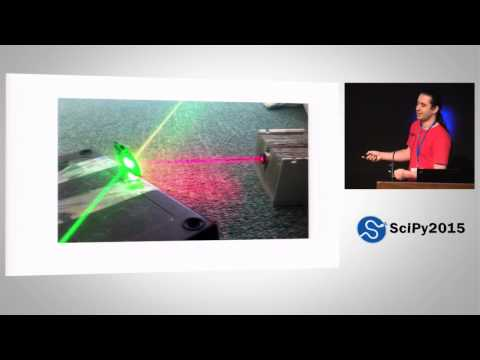

In [14]:
from IPython.display import YouTubeVideo
video_id = "xAoljeRJ3lU"
YouTubeVideo(video_id, width=560, height=315)

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.